In [243]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model
data = pd.read_csv("allguitnewnew2.csv")
data['Price'] = pd.to_numeric(data['Price'], errors='coerce', downcast='float')
data['Year'] = pd.to_numeric(data['Year'], errors='coerce', downcast='integer')

#filtered_pr['Price'] = filtered_pr['Price'].astype(float)
#filtered_pr['Price'].head()

We're looking at Ebay electric guitar listings with price > 280$

Brand
Schecter Guitar Research     307
Gibson                       401
PRS                          413
Unbranded                    434
Jackson                      598
Dean                         750
ESP                          926
Ibanez                      1265
Fender                      1282
Schecter                    1322
dtype: int64
      Brand    Year    Material                ProductLine            Model  \
0   Jackson     NaN         NaN                        NaN       2910124520   
1       DEB  2019.0      Okoume  DEB Luthier Built Guitars           Custom   
2     KTONE     NaN         NaN                        NaN              NaN   
3   Vintage     NaN  Solid Wood                        NaN            V62AB   
4  Epiphone     NaN         NaN                        NaN  Sheraton II PRO   

  StringConfiguration            Color     BodyType          Hand       Price  
0            6 String  Matte Army Drab        Solid  Right-Handed  299.989990  
1            6 S

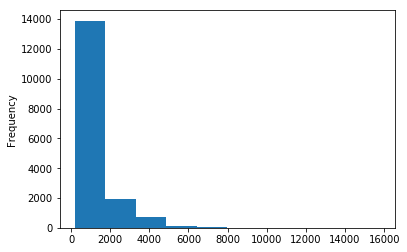

In [207]:
print(data.groupby('Brand').size().sort_values().tail(10))
print(data.head())
data[data['Price'] < 100000][ 'Price'].plot.hist()

Histogram of all prices looks like Poisson distribution to me.

Now looking at three histograms for Ibanez, Fender and Gibson.

mean price: 961.68408203125
stddev : 664.8438720703125
median : 767.0


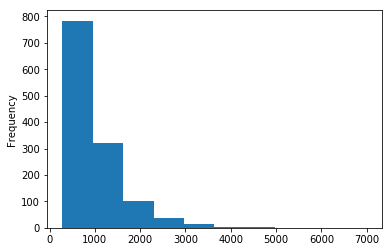

In [253]:
data[data['Brand'] == "Ibanez"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Ibanez"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Ibanez"]["Price"].std()))
print("median : " + str(data[data['Brand'] == "Ibanez"]['Price'].median()))

mean price: 1254.2010498046875
stddev : 766.2775268554688
median : 1024.989990234375


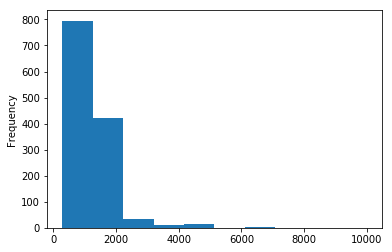

In [254]:
data[data['Brand'] == "Fender"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Fender"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Fender"]['Price'].std()))
print("median : " + str(data[data['Brand'] == "Fender"]['Price'].median()))

mean price: 2105.847412109375
stddev : 1001.06787109375
median : 1911.0


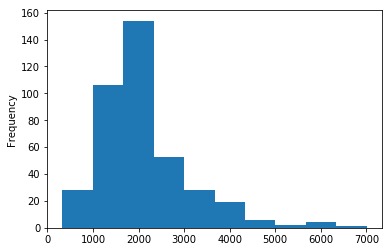

In [255]:
data[data['Brand'] == "Gibson"]['Price'].plot.hist()
print("mean price: " + str(data[data['Brand'] == "Gibson"]['Price'].mean()))
print("stddev : " + str(data[data['Brand'] == "Gibson"]['Price'].std()))
print("median : " + str(data[data['Brand'] == "Gibson"]['Price'].median()))

Now let's look at age dependence of prices

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


,Year,Price
Year,1.000000,-0.124991
Price,-0.124991,1.000000


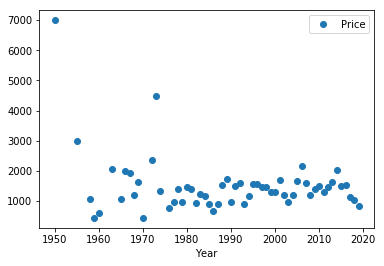

In [256]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Year'] < 2100]
#yearly.plot(x='Year',y='Price', style='o')

yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')

So, for all guitars if we don't take outstanding points into account, it's pretty unclear, does price increase or decrease with age. Now let's look brand-wise.

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


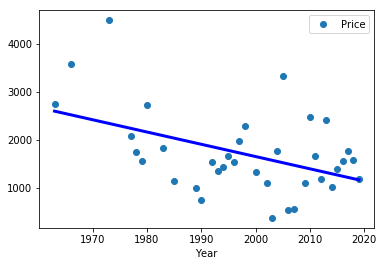

In [250]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Fender"]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


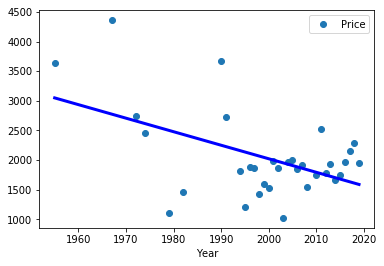

In [251]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Gibson"]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

D:\conda\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


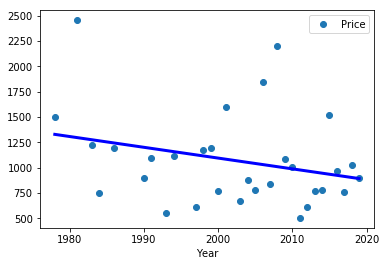

In [252]:
tmp = data[data['Year'].notnull()]
yearly = tmp[tmp['Price'] < 100000][tmp['Brand'] == "Ibanez"]
#yearly.plot(x='Year',y='Price', style='o')
yearly.groupby('Year').mean().plot(style='o')
yearly.corr(method='pearson')
gby = yearly.groupby('Year')['Price'].mean()
x = gby.index.values.reshape(gby.size,1)
y = gby.values.reshape(gby.size,1)
regr = linear_model.LinearRegression()
regr.fit(x,y)
#plt.scatter(x, y,  color='black')
plt.plot(x, regr.predict(x), color='blue', linewidth=3)
#plt.xticks(())
#plt.yticks(())
plt.show()

I think it's pretty visible that for famous brands like Gibson or Fender average price increases with age.
Now let's look at prices by material.

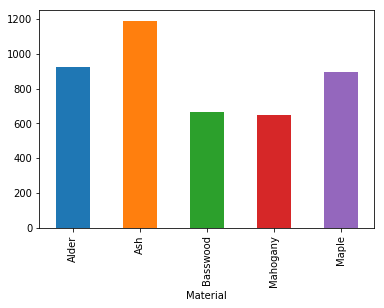

In [265]:
bodies = data.groupby('Material').size()
bodies.sort_values().tail(10)

pr = data[data['Material'].isin(['Alder','Mahogany','Maple','Basswood','Ash'])].groupby('Material')['Price'].median()
pr.plot.bar()